In [74]:
import pandas as pd
import os
os.chdir('C:\\0-ece204\\pr4')
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
merged = pd.read_csv('merged.csv')
merged.columns

Index(['patient_id', 'type', 'age_at_initial_pathologic_diagnosis', 'gender',
       'race', 'ajcc_pathologic_tumor_stage', 'histological_type',
       'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time',
       'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction',
       'Sample ID', 'Diagnosis Age',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code',
       'American Joint Committee on Cancer Publication Version Type',
       'Aneuploidy Score', 'Buffa Hypoxia Score', 'Cancer Type',
       'TCGA PanCanAtlas Cancer Type Acronym', 'Cancer Type Detailed',
       'Last Communication Contact from Initial Pathologic Diagnosis Date',
       'Birth from Initial Pathologic Diagnosis Date',
       'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
       'Disease Free (Months)', 'Disease Free Status',
       'Months of disease-specific survival',
       'Disease-specific Survival status', 'Ethnicity Category',
      

In [76]:
df = merged[['tumor_status','Subtype']]
df = df.dropna()
df = df[df['tumor_status'] != '[Discrepancy]']
df = pd.get_dummies(df)
df

,tumor_status_TUMOR FREE,tumor_status_WITH TUMOR,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
490,0,1,0,1
491,0,1,0,1
492,1,0,1,0
493,1,0,0,1


In [77]:
correlation_coef, p_value = pearsonr(df['tumor_status_TUMOR FREE'], df['Subtype_HNSC_HPV+'])
print('correlation coef:',correlation_coef,'; p value:',p_value)

correlation coef: 0.08543265578309452 ; p value: 0.0668488662677083


In [78]:
df = merged[['vital_status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)
df

,vital_status_Alive,vital_status_Dead,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
490,0,1,0,1
491,0,1,0,1
492,1,0,1,0
493,0,1,0,1


correlation coef: 0.16082598991475966 ; p value: 0.00036633236711967735


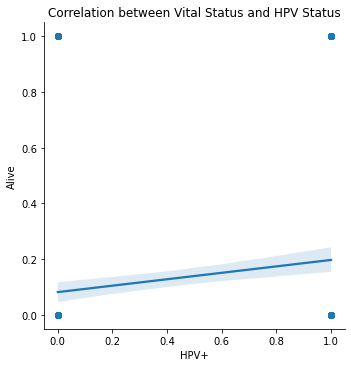

In [79]:
correlation_coef, p_value = pearsonr(df['vital_status_Alive'], df['Subtype_HNSC_HPV+'])
print('correlation coef:',correlation_coef,'; p value:',p_value)
sns.lmplot(x='vital_status_Alive', y='Subtype_HNSC_HPV+', data=df)
plt.title('Correlation between Vital Status and HPV Status')
plt.xlabel('HPV+')
plt.ylabel('Alive')
plt.show()

In [80]:
df = merged[['Disease Free Status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)
df

,Disease Free Status_0:DiseaseFree,Disease Free Status_1:Recurred/Progressed,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
7,0,1,1,0
9,1,0,0,1
14,1,0,1,0
19,1,0,0,1
23,0,1,0,1
...,...,...,...,...
464,1,0,1,0
468,1,0,0,1
475,1,0,0,1
493,1,0,0,1


In [81]:
correlation_coef, p_value = pearsonr(df['Disease Free Status_0:DiseaseFree'], df['Subtype_HNSC_HPV+'])
print('correlation coef:',correlation_coef,'; p value:',p_value)

correlation coef: 0.14730418195742653 ; p value: 0.1114306472299298


In [82]:
df = merged[['Disease-specific Survival status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)
df

,Disease-specific Survival status_0:ALIVE OR DEAD TUMOR FREE,Disease-specific Survival status_1:DEAD WITH TUMOR,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
490,0,1,0,1
491,0,1,0,1
492,1,0,1,0
493,1,0,0,1


correlation coef: 0.09307824559170912 ; p value: 0.045079615977181214


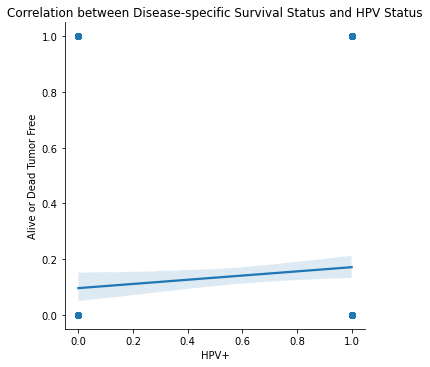

In [83]:
correlation_coef, p_value = pearsonr(df['Disease-specific Survival status_0:ALIVE OR DEAD TUMOR FREE'], df['Subtype_HNSC_HPV+'])
print('correlation coef:',correlation_coef,'; p value:',p_value)
sns.lmplot(x='Disease-specific Survival status_0:ALIVE OR DEAD TUMOR FREE', y='Subtype_HNSC_HPV+', data=df)
plt.title('Correlation between Disease-specific Survival Status and HPV Status')
plt.xlabel('HPV+')
plt.ylabel('Alive or Dead Tumor Free')
plt.show()